<a href="https://colab.research.google.com/github/keithferns98/DeepLearning/blob/main/COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets
! unzip covid19-xray-dataset-train-test-sets.zip

 96% 81.0M/84.3M [00:00<00:00, 89.4MB/s]
100% 84.3M/84.3M [00:00<00:00, 102MB/s] 
Archive:  covid19-xray-dataset-train-test-sets.zip
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0052-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0058-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0059-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0072-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0073-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0092-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0105-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0110-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0111-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0112-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2

In [2]:
import tensorflow as tf
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

In [3]:
train_dir='/content/xray_dataset_covid19/train/'
test_dir='/content/xray_dataset_covid19/test/'

In [4]:
import os
train_normal_dir = os.path.join(train_dir,'NORMAL')
train_pneumonia_dir = os.path.join(train_dir,'PNEUMONIA')
validation_normal_dir = os.path.join(test_dir,'NORMAL')
validation_pneumonia_dir = os.path.join(test_dir,'PNEUMONIA')

In [5]:
print('total training normal-rays :', len(os.listdir(train_normal_dir)))
print('total training Pneumonia x-rays:', len(os.listdir(train_pneumonia_dir)))
print('total test normal-rays :', len(os.listdir(validation_normal_dir)))
print('total test Pneumonia x-rays:', len(os.listdir(validation_pneumonia_dir)))

total training normal-rays : 74
total training Pneumonia x-rays: 74
total test normal-rays : 20
total test Pneumonia x-rays: 20


In [19]:
train_datagen=ImageDataGenerator(    
    rescale=1./255, width_shift_range=0.2,
    shear_range=0.2, height_shift_range = 0.2,
    zoom_range=0.2, 
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=16,
    class_mode='binary',
    subset='training'
)
# valid_generator=train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(64,64),
#     batch_size=16,
#     class_mode='binary',
#     subset='validation'
# )

test_generator = test_datagen.flow_from_directory(
    test_dir, # same directory as training data
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D,BatchNormalization,Dropout


In [22]:
#from tensorflow.python.keras.layers.normalization.batch_normalization import BatchNormalization

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( 
    os.path.join(os.getcwd(),'model.h5'),
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True)
model=Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.2),
    Flatten(),
    #Dense(300,activation='relu',kernel_initializer="he_normal"),
    Dense(100,activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )
hist = model.fit(train_generator,validation_data=test_generator,epochs=20,callbacks=[callback,model_checkpoint_callback])

Epoch 1/20
10/10 [==============================] - 9s 809ms/step - loss: 0.7480 - accuracy: 0.6486 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 7s 737ms/step - loss: 0.6288 - accuracy: 0.7230 - val_loss: 0.6778 - val_accuracy: 0.8000
Epoch 3/20
10/10 [==============================] - 7s 641ms/step - loss: 0.4221 - accuracy: 0.8041 - val_loss: 0.6235 - val_accuracy: 0.7000
Epoch 4/20
10/10 [==============================] - 7s 744ms/step - loss: 0.3392 - accuracy: 0.8446 - val_loss: 0.5721 - val_accuracy: 0.7500
Epoch 5/20
10/10 [==============================] - 7s 738ms/step - loss: 0.3014 - accuracy: 0.8581 - val_loss: 0.5198 - val_accuracy: 0.7500
Epoch 6/20
10/10 [==============================] - 7s 790ms/step - loss: 0.2905 - accuracy: 0.8649 - val_loss: 0.5703 - val_accuracy: 0.5500
Epoch 7/20
10/10 [==============================] - 7s 716ms/step - loss: 0.3656 - accuracy: 0.8581 - val_loss: 0.6216 - val_accuracy: 0.6250
Epoch 

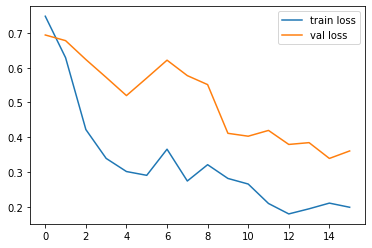

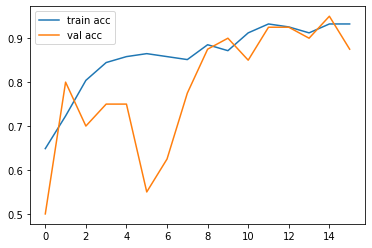

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')